<a href="https://colab.research.google.com/github/sarveshahuja1992/Rise-and-fall-of-programming-languages/blob/master/Rise_and_Fall_of_Programming_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
import pandas as pd
import numpy as np
r = requests.get('https://insights.stackoverflow.com/trends/get-data')
j = r.json()

In [0]:
new = j['TagPercents']
x = pd.DataFrame.from_dict(new, orient= 'index')
x['index1'] = x.index
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,index1
.htaccess,0.105597,0.086102,0.069180,0.127328,0.100234,0.152487,0.200849,0.212094,0.217443,0.207274,0.214087,0.239622,0.342023,0.241295,0.269168,0.230668,0.306904,0.275593,0.278689,0.310116,0.311570,0.238081,0.342744,0.309168,0.318899,0.377929,0.340291,0.336103,0.375462,0.374691,0.361956,0.375791,0.388544,0.322770,0.334485,0.371946,0.342762,0.395249,0.412576,0.405808,...,0.393505,0.415154,0.343643,0.325589,0.323775,0.393972,0.371121,0.345065,0.353749,0.318860,0.299151,0.307868,0.306875,0.314780,0.294029,0.244222,0.286537,0.308896,0.278835,0.230627,0.215655,0.212729,0.207560,0.207825,0.207773,0.199203,0.200420,0.192910,0.237492,0.227368,0.205840,0.221065,0.227635,0.192173,0.176427,0.199906,0.215720,0.195541,0.167070,.htaccess
.net,11.694826,11.078424,10.840540,9.597326,9.463749,9.702014,9.302192,8.809312,8.168282,7.661322,7.047028,6.737412,6.569298,6.065974,5.938341,5.331586,5.340130,5.242993,5.349036,5.410663,5.049449,4.796469,4.495355,4.310160,4.331970,4.423412,3.993698,3.933703,3.747401,3.863457,3.897060,3.684534,3.571056,3.535530,3.477840,3.402069,3.111873,3.046549,2.869325,2.718820,...,1.035510,0.921783,0.918484,0.936570,0.927907,0.926290,0.916314,0.929828,0.837619,0.888059,0.929062,0.892817,0.866739,0.851830,0.881495,0.823803,0.830542,0.843185,0.903585,0.821753,0.848366,0.902595,0.879191,0.896997,0.891456,0.866464,0.890615,0.863500,0.826604,0.820630,0.877496,0.772921,0.744018,0.741480,0.741120,0.760549,0.719066,0.819889,0.757643,.net
.net-2.0,0.607181,0.394633,0.636458,0.509311,0.451052,0.324036,0.418914,0.281148,0.226897,0.215096,0.210519,0.217838,0.126333,0.079414,0.110997,0.112713,0.080062,0.056015,0.071920,0.067417,0.064324,0.073554,0.068549,0.061172,0.071042,0.059154,0.064592,0.044718,0.044767,0.045113,0.047054,0.032721,0.027156,0.031879,0.042314,0.031739,0.032600,0.030329,0.025601,0.023817,...,0.002214,0.001759,0.000574,0.001148,0.001861,0.002277,0.001149,0.001498,0.001127,0.001079,0.002258,0.001679,0.001702,0.002483,0.002958,0.000596,0.001384,0.002511,0.001973,0.001165,0.000620,0.001803,0.002611,0.002527,0.001906,0.001393,0.001879,0.000656,0.001319,0.000584,0.001190,0.001076,0.000561,0.000000,0.000632,0.001133,0.001262,0.001257,0.001110,.net-2.0
.net-3.5,1.055966,0.523786,0.532688,0.501353,0.542934,0.489231,0.504993,0.537634,0.439612,0.394994,0.331835,0.314309,0.246503,0.247404,0.266393,0.220183,0.226842,0.235262,0.240482,0.196471,0.277398,0.253566,0.266979,0.244689,0.222598,0.174176,0.195353,0.232243,0.142964,0.125315,0.159261,0.110060,0.110714,0.096632,0.087651,0.071414,0.075445,0.061635,0.058095,0.049466,...,0.005535,0.007037,0.003442,0.002871,0.001861,0.003416,0.007468,0.004494,0.009013,0.004316,0.005080,0.007837,0.004538,0.001863,0.004141,0.004170,0.003461,0.003139,0.007892,0.006406,0.003098,0.003005,0.005874,0.008212,0.001906,0.005572,0.003132,0.005249,0.006597,0.009352,0.005354,0.002151,0.001682,0.002834,0.002529,0.002265,0.003785,0.001257,0.001110,.net-3.5
2d,0.026399,0.078927,0.083016,0.031832,0.116940,0.025415,0.051647,0.064122,0.042543,0.039108,0.035681,0.049791,0.064707,0.036652,0.038849,0.034076,0.026687,0.024647,0.044950,0.025040,0.050253,0.050326,0.034274,0.041333,0.028417,0.042722,0.045687,0.025965,0.044767,0.028822,0.048261,0.042636,0.043868,0.043833,0.051382,0.042650,0.040982,0.043047,0.047264,0.041222,...,0.018817,0.021696,0.026390,0.037325,0.028532,0.031882,0.025278,0.026467,0.024785,0.024818,0.022013,0.020151,0.021555,0.019868,0.020115,0.026209,0.029069,0.025113,0.023675,0.017472,0.022309,0.022234,0.016318,0.024636,0.024145,0.027164,0.020042,0.040682,0.021110,0.023964,0.029151,0.030121,0.026912,0.014739,0.017706,0.018122,0.014507,0.023892,0.027752,2d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [0]:
new_df = x.melt(id_vars=['index1'],value_name='TagPercent')
new_df

,index1,variable,TagPercent
0,.htaccess,0,0.105597
1,.net,0,11.694826
2,.net-2.0,0,0.607181
3,.net-3.5,0,1.055966
4,2d,0,0.026399
...,...,...,...
370435,python-3.7,134,0.137097
370436,flutter-layout,134,0.143203
370437,google-cloud-firestore,134,0.384094
370438,puppeteer,134,0.072712


In [0]:
dict1 = j['Month'],j['Year']
df1=pd.DataFrame(dict1).transpose()
df1.columns = ['Month', 'Year']
df1
badadf = pd.DataFrame(np.repeat(df1.values,2744,axis=0))
badadf.columns = df1.columns

In [0]:
new_df['Month'] = badadf['Month']
new_df['Year'] = badadf['Year']
new_df['Date'] = new_df['Month'].map(str)+ '-' +new_df['Year'].map(str)
new_df['Date'] = pd.to_datetime(new_df['Date'], format='%m-%Y').dt.strftime('%m-%Y')
new_df.columns = ['tag','variable','percentage of questions yearly','Month','Year','Date']
data = new_df

In [0]:
r_programming =  data['tag'] =='r'
questionsonr = data[r_programming]
python_prog =  data['tag'] =='python'
questionsonpython = data[python_prog]
questionsonpython

,tag,variable,percentage of questions yearly,Month,Year,Date
702,python,0,3.273495,8,2008,08-2008
3446,python,1,3.896104,9,2008,09-2008
6190,python,2,3.535109,10,2008,10-2008
8934,python,3,3.604966,11,2008,11-2008
11678,python,4,3.683595,12,2008,12-2008
...,...,...,...,...,...,...
357422,python,130,12.607896,6,2019,06-2019
360166,python,131,12.865338,7,2019,07-2019
362910,python,132,12.929942,8,2019,08-2019
365654,python,133,12.170064,9,2019,09-2019


In [0]:
pandas = data['tag'] == 'pandas'
questionsonpandas = data[pandas]
sql = data['tag'] == 'sql'
questionsonsql = data[sql]
questionsonsql
Csharp = data['tag'] == 'c#'
questionsonCsharp = data[Csharp]
C = data['tag'] == 'c'
questionsonc = data[C]
Cpp = data['tag'] == 'c++'
questionsoncpp = data[Cpp]
Java = data['tag'] == 'java'
questionsonjava = data[Java]
Javascript = data['tag'] == 'javascript'
questionsonjavascr = data[Javascript]
questionsonjavascr

,tag,variable,percentage of questions yearly,Month,Year,Date
464,javascript,0,4.250264,8,2008,08-2008
3208,javascript,1,4.592093,9,2008,09-2008
5952,javascript,2,5.015566,10,2008,10-2008
8696,javascript,3,4.607671,11,2008,11-2008
11440,javascript,4,5.228867,12,2008,12-2008
...,...,...,...,...,...,...
357184,javascript,130,10.715889,6,2019,06-2019
359928,javascript,131,10.567835,7,2019,07-2019
362672,javascript,132,10.967648,8,2019,08-2019
365416,javascript,133,10.661067,9,2019,09-2019


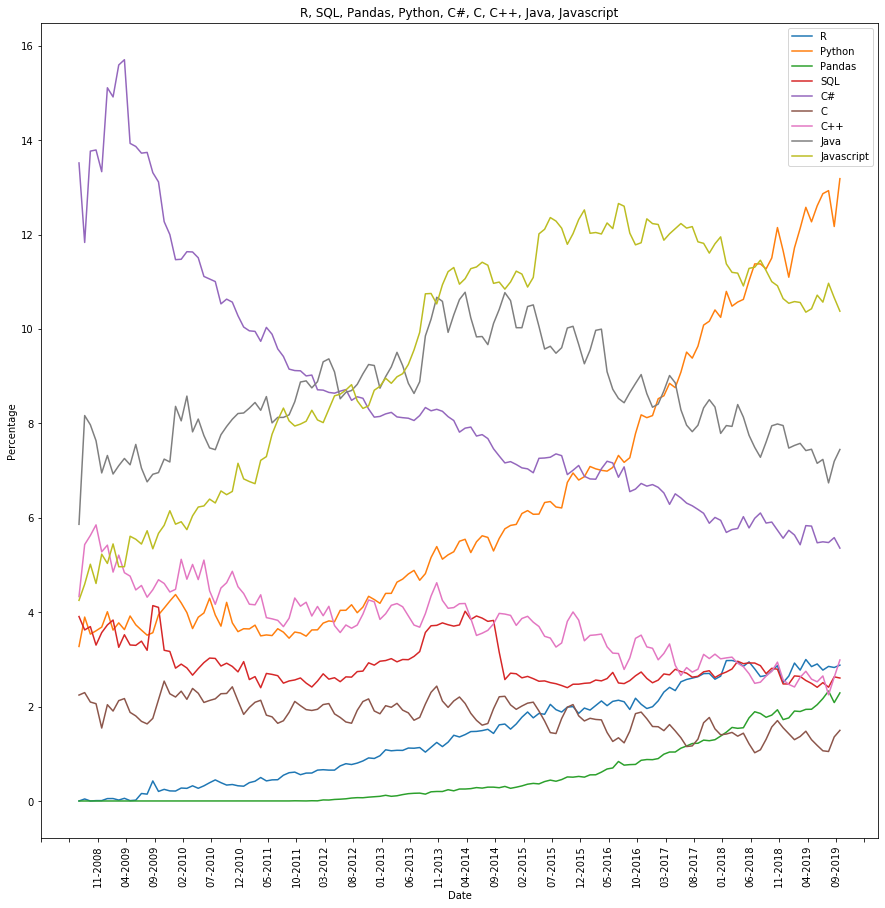

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
plt.plot(questionsonr['Date'],questionsonr['percentage of questions yearly'] , label='R')
plt.plot(questionsonpython['Date'],questionsonpython['percentage of questions yearly'] , label='Python')
plt.plot(questionsonpandas['Date'],questionsonpandas['percentage of questions yearly'] , label='Pandas')
plt.plot(questionsonsql['Date'],questionsonsql['percentage of questions yearly'] , label='SQL')
plt.plot(questionsonCsharp['Date'],questionsonCsharp['percentage of questions yearly'] , label='C#')
plt.plot(questionsonc['Date'],questionsonc['percentage of questions yearly'] , label='C')
plt.plot(questionsoncpp['Date'],questionsoncpp['percentage of questions yearly'] , label='C++')
plt.plot(questionsonjava['Date'],questionsonjava['percentage of questions yearly'] , label='Java')
plt.plot(questionsonjavascr['Date'],questionsonjavascr['percentage of questions yearly'] , label='Javascript')
plt.xlabel('Date')
plt.xticks(rotation=90)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))
plt.ylabel('Percentage')
plt.title("R, SQL, Pandas, Python, C#, C, C++, Java, Javascript")
plt.legend()
plt.show()

In [0]:
df = data.sort_values('Year', ascending=False)

In [0]:
df = df.sort_values('percentage of questions yearly', ascending=False)
df

,tag,variable,percentage of questions yearly,Month,Year,Date
22067,c#,8,15.703143,4,2009,04-2009
19323,c#,7,15.591398,3,2009,03-2009
13835,c#,5,15.108965,1,2009,01-2009
16579,c#,6,14.914496,2,2009,02-2009
24811,c#,9,13.930387,5,2009,05-2009
...,...,...,...,...,...,...
90513,enzyme,32,0.000000,4,2011,04-2011
15527,spring-integration,5,0.000000,1,2009,01-2009
15528,sql-server-2008-r2,5,0.000000,1,2009,01-2009
15529,task-parallel-library,5,0.000000,1,2009,01-2009


In [0]:
df = df.drop_duplicates(['Year'])
df = df.sort_values(by ='Year' )


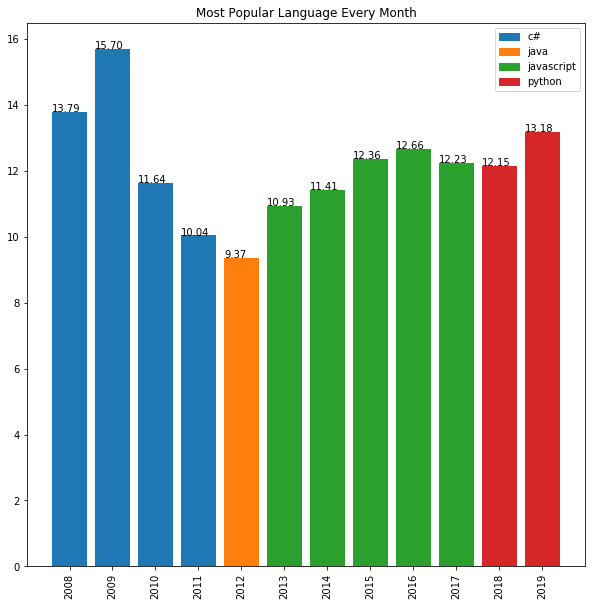

In [0]:
import matplotlib.patches as mpatches
from datetime import datetime
#df['Date'] = df['Date'].dt.strftime('%Y%m%d')
plt.figure(figsize=(10,10))
colors = {'c#':'tab:blue','java':'tab:orange','javascript':'tab:green','python':'tab:red'}
bars = plt.bar(df['Year'],df['percentage of questions yearly'],color=df['tag'].apply(lambda x: colors[x]))
plt.title("Most Popular Language Every Month")
plt.xticks(rotation=90)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))
patchList = []
for key in colors:
        data_key = mpatches.Patch(color=colors[key], label=key)
        patchList.append(data_key)
plt.legend(handles=patchList)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, '%.2f'%(yval))

In [0]:
winp = data['tag'] == 'windows-phone'
questionsonwindowsp = data[winp]
adr = data['tag'] == 'android'
questionsonadr = data[adr]
ios = data['tag'] == 'ios'
questionsonios = data[ios]

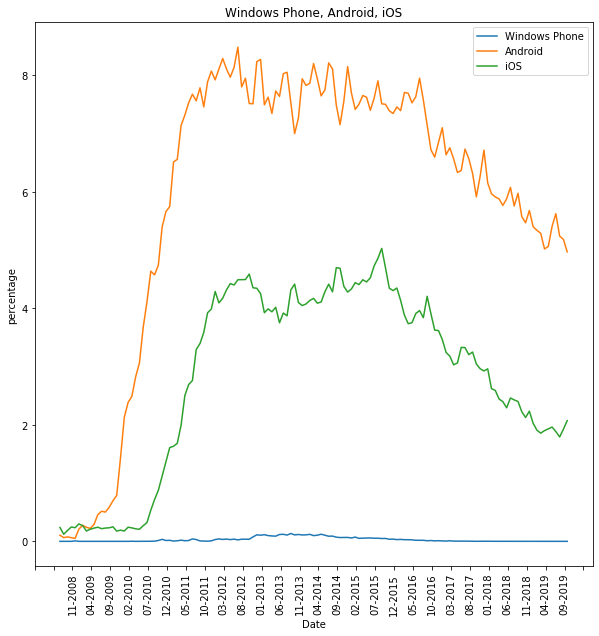

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(questionsonwindowsp['Date'],questionsonwindowsp['percentage of questions yearly'] , label='Windows Phone')
plt.plot(questionsonadr['Date'],questionsonadr['percentage of questions yearly'] , label='Android')
plt.plot(questionsonios['Date'],questionsonios['percentage of questions yearly'] , label='iOS')
plt.xlabel('Date')
plt.ylabel('percentage')
plt.xticks(rotation=90)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))
plt.title("Windows Phone, Android, iOS")
plt.legend()
plt.show()